# Load All libraries

In [1]:

import pandas as pd
import numpy as np
np.random.seed(42)
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.impute import SimpleImputer
from sklearn.calibration import LabelEncoder
from sklearn.model_selection import train_test_split,GridSearchCV, StratifiedKFold
from xgboost import XGBClassifier
import lazypredict
from lazypredict.Supervised import LazyClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score,f1_score



from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.ensemble import StackingClassifier
from sklearn.preprocessing import OneHotEncoder

# Load the data set

In [2]:
# Load a dataset into a Pandas Dataframe
train_df = pd.read_csv('./spaceship-titanic/CS559_S23_Competition_Data/train_.csv')
val_df = pd.read_csv('./spaceship-titanic/CS559_S23_Competition_Data/validation_.csv')
test_df = pd.read_csv('./spaceship-titanic/CS559_S23_Competition_Data/test_.csv')
print("Full train dataset shape is {}".format(train_df.shape))
print("Full test dataset shape is {}".format(test_df.shape))

Full train dataset shape is (6258, 15)
Full test dataset shape is (1739, 15)


# EDA 

In [3]:
# Display the first 5 examples
train_df.head(5)

,Unnamed: 0,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported
0,0,3856_01,Earth,False,F/726/S,NaN,23.00,False,339.00,754.00,7.00,0.00,0.00,Ward Alvasquez,True
1,1,6110_01,Earth,False,E/389/P,55 Cancri e,57.00,False,0.00,0.00,0.00,0.00,642.00,Sus Warrishales,True
2,2,6908_01,Europa,False,C/254/S,TRAPPIST-1e,60.00,False,0.00,960.00,46.00,854.00,17074.00,Sheleon Swinvul,False
3,3,5628_01,Earth,True,G/900/P,TRAPPIST-1e,27.00,False,0.00,0.00,0.00,0.00,0.00,Ebonya Potthews,False
4,4,1193_02,Europa,True,B/50/S,55 Cancri e,25.00,False,0.00,0.00,0.00,0.00,0.00,Solam Presstic,True


In [4]:
val_df.head(5)

,Unnamed: 0,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported
0,0,7464_01,Earth,True,G/1207/P,TRAPPIST-1e,11.00,False,0.00,0.00,0.00,0.00,0.00,Lynnie Hickett,True
1,1,2338_02,Earth,False,F/474/P,TRAPPIST-1e,26.00,False,14.00,0.00,0.00,857.00,0.00,Julion Moodman,False
2,2,3134_01,Europa,False,C/119/S,PSO J318.5-22,62.00,True,0.00,4513.00,0.00,85.00,1437.00,Enifik Clughted,True
3,3,7442_01,Earth,False,E/495/S,TRAPPIST-1e,43.00,False,20.00,0.00,726.00,NaN,0.00,Antony Morrencis,False
4,4,2374_01,Mars,False,E/166/S,TRAPPIST-1e,20.00,False,464.00,0.00,1432.00,0.00,0.00,Gers Sames,True


In [5]:
test_df.head(5)

,Unnamed: 0,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported
0,0,8609_01,Earth,False,E/564/S,TRAPPIST-1e,27.00,False,0.00,0.00,2.00,994.00,0.00,Bara Cochrisons,False
1,1,0073_01,Mars,False,D/3/P,PSO J318.5-22,37.00,False,46.00,83.00,738.00,0.00,12.00,Gorn Make,False
2,2,9069_01,Europa,True,B/297/P,TRAPPIST-1e,22.00,False,0.00,0.00,0.00,0.00,0.00,Azhat Brakeng,True
3,3,5619_01,Earth,True,G/908/S,55 Cancri e,28.00,False,0.00,0.00,0.00,0.00,0.00,Gordo Freder,True
4,4,0941_01,Earth,False,F/195/P,TRAPPIST-1e,13.00,False,0.00,7.00,0.00,1175.00,0.00,Carita Steeletters,False


In [6]:
train_df.drop(['Unnamed: 0'], axis=1,inplace=True)
val_df.drop(['Unnamed: 0'], axis=1,inplace=True)
test_df.drop(['Unnamed: 0'], axis=1,inplace=True)




In [7]:
train_df[['deck', 'num', 'side']] = train_df['Cabin'].str.split('/', expand=True)
val_df[['deck', 'num', 'side']] = val_df['Cabin'].str.split('/', expand=True)
test_df[['deck', 'num', 'side']] = test_df['Cabin'].str.split('/', expand=True)

unique_letters_side = set(train_df['side'].unique()) \
                 .union(set(val_df['side'].unique())) \
                 .union(set(test_df['side'].unique()))

unique_letters_deck = set(train_df['deck'].unique()) \
                 .union(set(val_df['deck'].unique())) \
                 .union(set(test_df['deck'].unique()))

print(unique_letters_side)
print(unique_letters_deck)


{'P', nan, 'S'}
{'F', 'C', 'D', nan, 'T', 'A', 'G', 'E', 'B'}


In [8]:
train_df['deck'] = train_df['deck'].fillna('Z')
val_df['deck'] = val_df['deck'].fillna('Z')
test_df['deck'] = test_df['deck'].fillna('Z')


train_df['side'] = train_df['side'].fillna('Z')
val_df['side'] = val_df['side'].fillna('Z')
test_df['side'] = test_df['side'].fillna('Z')

In [9]:
# Add any missing columns in val_encoded and test_encoded
all_deck_values = set(train_df['deck'].unique()) \
             .union(set(val_df['deck'].unique())) \
             .union(set(test_df['deck'].unique()))

# Add any missing columns in val_encoded and test_encoded
all_side_values = set(train_df['side'].unique()) \
             .union(set(val_df['side'].unique())) \
             .union(set(test_df['side'].unique()))

print(all_deck_values)
print(all_side_values)

{'F', 'C', 'D', 'T', 'A', 'G', 'E', 'Z', 'B'}
{'P', 'Z', 'S'}


In [10]:


# apply one-hot encoding to the letters in col2
deck = pd.get_dummies(train_df['deck'], prefix="deck")
side = pd.get_dummies(train_df['side'], prefix="side")

# join the one-hot encoded dataframe back to the original dataframe
train_df = train_df.join(deck)
train_df = train_df.join(side)

# drop the original feature and col2 (since it's now one-hot encoded)
train_df.drop(['Cabin', 'deck',  'side'], axis=1, inplace=True)

print(train_df.shape)

(6258, 26)


In [11]:


# apply one-hot encoding to the letters in col2
deck = pd.get_dummies(test_df['deck'],prefix="deck")
side = pd.get_dummies(test_df['side'],prefix="side")

# join the one-hot encoded dataframe back to the original dataframe
test_df = test_df.join(deck)
test_df = test_df.join(side)

# drop the original feature and col2 (since it's now one-hot encoded)
test_df.drop(['Cabin', 'deck',  'side'], axis=1, inplace=True)
print(test_df.shape)

(1739, 26)


In [12]:


# apply one-hot encoding to the letters in col2
deck = pd.get_dummies(val_df['deck'],prefix="deck")
side = pd.get_dummies(val_df['side'],prefix="side")

# join the one-hot encoded dataframe back to the original dataframe
val_df = val_df.join(deck)
val_df = val_df.join(side)

# drop the original feature and col2 (since it's now one-hot encoded)
val_df.drop(['Cabin', 'deck',  'side'], axis=1, inplace=True)

print(val_df.shape)

(696, 25)


In [13]:
for deck in all_deck_values:
    if "deck_"+deck not in train_df.columns:
        train_df["deck_"+deck] = 0


for side in all_side_values:
    if "side_"+side not in train_df.columns:
        train_df["side_"+side] = 0

for deck in all_deck_values:
    if "deck_"+deck not in val_df.columns:
        val_df["deck_"+deck] = 0


for side in all_side_values:
    if "side_"+side not in test_df.columns:
        test_df["side_"+side] = 0


print(train_df.shape)
print(val_df.shape)
print(test_df.shape)

(6258, 26)
(696, 26)
(1739, 26)


In [14]:
train_df.describe()

,Age,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,deck_A,deck_B,deck_C,deck_D,deck_E,deck_F,deck_G,deck_T,deck_Z,side_P,side_S,side_Z
count,6128.00,6132.00,6132.00,6107.00,6140.00,6129.00,6258.00,6258.00,6258.00,6258.00,6258.00,6258.00,6258.00,6258.00,6258.00,6258.00,6258.00,6258.00
mean,28.77,229.00,455.55,175.93,306.63,299.69,0.03,0.09,0.09,0.05,0.10,0.32,0.30,0.00,0.02,0.49,0.49,0.02
std,14.51,686.85,1594.71,621.13,1105.12,1134.90,0.17,0.28,0.28,0.22,0.30,0.47,0.46,0.03,0.15,0.50,0.50,0.15
min,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
25%,19.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
50%,27.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
75%,38.00,51.00,70.25,28.00,58.00,42.00,0.00,0.00,0.00,0.00,0.00,1.00,1.00,0.00,0.00,1.00,1.00,0.00
max,79.00,14327.00,29813.00,23492.00,18572.00,20336.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00


In [15]:
val_df.describe()

,Age,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,deck_A,deck_B,deck_C,deck_D,deck_E,deck_F,deck_G,deck_Z,side_P,side_S,side_Z,deck_T
count,681.00,686.00,685.00,680.00,673.00,681.00,696.00,696.00,696.00,696.00,696.00,696.00,696.00,696.00,696.00,696.00,696.00,696.00
mean,29.54,232.64,580.98,153.88,289.74,315.81,0.03,0.10,0.08,0.06,0.11,0.33,0.27,0.02,0.46,0.52,0.02,0.00
std,14.86,696.43,2195.56,482.55,1319.70,1325.67,0.17,0.30,0.27,0.24,0.32,0.47,0.45,0.14,0.50,0.50,0.14,0.00
min,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
25%,20.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
50%,27.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00,0.00,0.00
75%,39.00,40.50,106.00,10.00,73.00,75.00,0.00,0.00,0.00,0.00,0.00,1.00,1.00,0.00,1.00,1.00,0.00,0.00
max,79.00,9920.00,27723.00,6124.00,22408.00,24133.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,0.00


In [16]:
test_df.describe()

,Age,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,deck_A,deck_B,deck_C,deck_D,deck_E,deck_F,deck_G,deck_T,deck_Z,side_P,side_S,side_Z
count,1705.00,1694.00,1693.00,1698.00,1697.00,1695.00,1739.00,1739.00,1739.00,1739.00,1739.00,1739.00,1739.00,1739.00,1739.00,1739.00,1739.00,1739.00
mean,28.76,205.85,417.51,173.76,335.96,319.14,0.03,0.09,0.09,0.06,0.09,0.31,0.29,0.00,0.02,0.48,0.49,0.02
std,14.27,574.02,1374.11,588.71,1170.88,1106.60,0.17,0.29,0.29,0.24,0.29,0.46,0.45,0.02,0.15,0.50,0.50,0.15
min,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
25%,20.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
50%,27.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
75%,38.00,35.00,85.00,33.00,61.00,52.00,0.00,0.00,0.00,0.00,0.00,1.00,1.00,0.00,0.00,1.00,1.00,0.00
max,76.00,8030.00,16521.00,10705.00,16594.00,16337.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00


In [17]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6258 entries, 0 to 6257
Data columns (total 26 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   PassengerId   6258 non-null   object 
 1   HomePlanet    6116 non-null   object 
 2   CryoSleep     6102 non-null   object 
 3   Destination   6136 non-null   object 
 4   Age           6128 non-null   float64
 5   VIP           6106 non-null   object 
 6   RoomService   6132 non-null   float64
 7   FoodCourt     6132 non-null   float64
 8   ShoppingMall  6107 non-null   float64
 9   Spa           6140 non-null   float64
 10  VRDeck        6129 non-null   float64
 11  Name          6113 non-null   object 
 12  Transported   6258 non-null   bool   
 13  num           6114 non-null   object 
 14  deck_A        6258 non-null   uint8  
 15  deck_B        6258 non-null   uint8  
 16  deck_C        6258 non-null   uint8  
 17  deck_D        6258 non-null   uint8  
 18  deck_E        6258 non-null 

In [18]:
test_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1739 entries, 0 to 1738
Data columns (total 26 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   PassengerId   1739 non-null   object 
 1   HomePlanet    1699 non-null   object 
 2   CryoSleep     1694 non-null   object 
 3   Destination   1698 non-null   object 
 4   Age           1705 non-null   float64
 5   VIP           1696 non-null   object 
 6   RoomService   1694 non-null   float64
 7   FoodCourt     1693 non-null   float64
 8   ShoppingMall  1698 non-null   float64
 9   Spa           1697 non-null   float64
 10  VRDeck        1695 non-null   float64
 11  Name          1700 non-null   object 
 12  Transported   1739 non-null   bool   
 13  num           1697 non-null   object 
 14  deck_A        1739 non-null   uint8  
 15  deck_B        1739 non-null   uint8  
 16  deck_C        1739 non-null   uint8  
 17  deck_D        1739 non-null   uint8  
 18  deck_E        1739 non-null 

<Axes: >

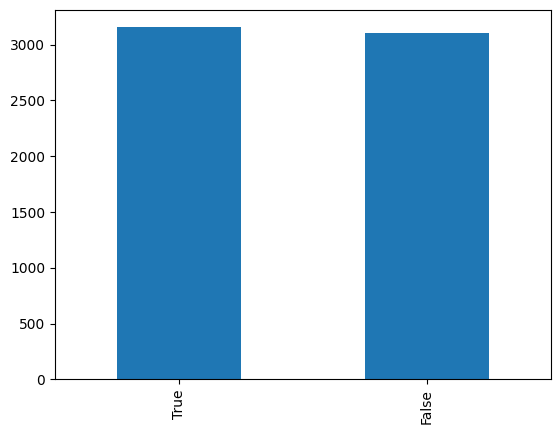

In [19]:
plot_df = train_df.Transported.value_counts()
plot_df.plot(kind="bar")

In [20]:
# fig, ax = plt.subplots(5,1,  figsize=(10, 10))
# plt.subplots_adjust(top = 2)

# sns.histplot(dataset_df['Age'], color='b', bins=50, ax=ax[0])
# sns.histplot(dataset_df['FoodCourt'], color='b', bins=50, ax=ax[1])
# sns.histplot(dataset_df['ShoppingMall'], color='b', bins=50, ax=ax[2])
# sns.histplot(dataset_df['Spa'], color='b', bins=50, ax=ax[3])
# sns.histplot(dataset_df['VRDeck'], color='b', bins=50, ax=ax[4])

In [21]:
# check for null values
train_df.isnull().sum().sort_values(ascending=False)

CryoSleep       156
VIP             152
ShoppingMall    151
Name            145
num             144
HomePlanet      142
Age             130
VRDeck          129
RoomService     126
FoodCourt       126
Destination     122
Spa             118
side_S            0
deck_F            0
side_P            0
deck_Z            0
deck_T            0
deck_G            0
PassengerId       0
deck_E            0
deck_D            0
deck_C            0
deck_B            0
deck_A            0
Transported       0
side_Z            0
dtype: int64

In [22]:
# check for null values
val_df.isnull().sum().sort_values(ascending=False)

Spa             23
Destination     19
HomePlanet      19
ShoppingMall    16
CryoSleep       16
Name            16
Age             15
VRDeck          15
num             13
FoodCourt       11
RoomService     10
VIP              8
deck_F           0
side_Z           0
side_S           0
side_P           0
deck_Z           0
deck_G           0
PassengerId      0
deck_E           0
deck_D           0
deck_C           0
deck_B           0
deck_A           0
Transported      0
deck_T           0
dtype: int64

In [23]:
# check for null values
test_df.isnull().sum().sort_values(ascending=False)

FoodCourt       46
RoomService     45
CryoSleep       45
VRDeck          44
VIP             43
num             42
Spa             42
ShoppingMall    41
Destination     41
HomePlanet      40
Name            39
Age             34
deck_F           0
side_S           0
side_P           0
deck_Z           0
deck_T           0
deck_G           0
PassengerId      0
deck_E           0
deck_D           0
deck_C           0
deck_B           0
deck_A           0
Transported      0
side_Z           0
dtype: int64

In [24]:
print("Train unique values: \n",train_df.nunique() )

Train unique values: 
 PassengerId     6258
HomePlanet         3
CryoSleep          2
Destination        3
Age               79
VIP                2
RoomService     1050
FoodCourt       1187
ShoppingMall     916
Spa             1075
VRDeck          1052
Name            6102
Transported        2
num             1724
deck_A             2
deck_B             2
deck_C             2
deck_D             2
deck_E             2
deck_F             2
deck_G             2
deck_T             2
deck_Z             2
side_P             2
side_S             2
side_Z             2
dtype: int64


In [25]:
print("validation unique values: \n",val_df.nunique() )

validation unique values: 
 PassengerId     696
HomePlanet        3
CryoSleep         2
Destination       3
Age              70
VIP               2
RoomService     189
FoodCourt       210
ShoppingMall    162
Spa             201
VRDeck          196
Name            680
Transported       2
num             520
deck_A            2
deck_B            2
deck_C            2
deck_D            2
deck_E            2
deck_F            2
deck_G            2
deck_Z            2
side_P            2
side_S            2
side_Z            2
deck_T            1
dtype: int64


In [26]:
print("test unique values: \n",test_df.nunique() )

test unique values: 
 PassengerId     1739
HomePlanet         3
CryoSleep          2
Destination        3
Age               74
VIP                2
RoomService      388
FoodCourt        440
ShoppingMall     383
Spa              418
VRDeck           423
Name            1699
Transported        2
num              973
deck_A             2
deck_B             2
deck_C             2
deck_D             2
deck_E             2
deck_F             2
deck_G             2
deck_T             2
deck_Z             2
side_P             2
side_S             2
side_Z             2
dtype: int64


In [27]:
print("Train distinct values: \n",train_df['HomePlanet'].unique())

Train distinct values: 
 ['Earth' 'Europa' nan 'Mars']


In [28]:
print("validation distinct values: \n",val_df['HomePlanet'].unique())

validation distinct values: 
 ['Earth' 'Europa' 'Mars' nan]


In [29]:
print("test distinct values: \n",test_df['HomePlanet'].unique())

test distinct values: 
 ['Earth' 'Mars' 'Europa' nan]


In [30]:
# List of unique values 'Destination'
print("Train distinct values: \n",train_df['Destination'].unique())

Train distinct values: 
 [nan '55 Cancri e' 'TRAPPIST-1e' 'PSO J318.5-22']


In [31]:
# List of unique values 'Destination'
print("validation distinct values: \n",val_df['Destination'].unique())

validation distinct values: 
 ['TRAPPIST-1e' 'PSO J318.5-22' '55 Cancri e' nan]


In [32]:
# List of unique values 'Destination'
print("test distinct values: \n",test_df['Destination'].unique())

test distinct values: 
 ['TRAPPIST-1e' 'PSO J318.5-22' '55 Cancri e' nan]


In [33]:
# Check for duplicate Ids
# Train
idsUnique = len(set(train_df.PassengerId))
idsTotal = train_df.shape[0]
idsDupli = idsTotal - idsUnique
print("Train: There are " + str(idsDupli) + " duplicate IDs for " + str(idsTotal) + " total entries")

Train: There are 0 duplicate IDs for 6258 total entries


In [34]:
 # we drop PassengerId and Name as they dont provide any valuable meaning to training data 
train = train_df.drop(['PassengerId', 'Name'], axis=1)
train.head(5)

,HomePlanet,CryoSleep,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,...,deck_C,deck_D,deck_E,deck_F,deck_G,deck_T,deck_Z,side_P,side_S,side_Z
0,Earth,False,NaN,23.00,False,339.00,754.00,7.00,0.00,0.00,...,0,0,0,1,0,0,0,0,1,0
1,Earth,False,55 Cancri e,57.00,False,0.00,0.00,0.00,0.00,642.00,...,0,0,1,0,0,0,0,1,0,0
2,Europa,False,TRAPPIST-1e,60.00,False,0.00,960.00,46.00,854.00,17074.00,...,1,0,0,0,0,0,0,0,1,0
3,Earth,True,TRAPPIST-1e,27.00,False,0.00,0.00,0.00,0.00,0.00,...,0,0,0,0,1,0,0,1,0,0
4,Europa,True,55 Cancri e,25.00,False,0.00,0.00,0.00,0.00,0.00,...,0,0,0,0,0,0,0,0,1,0


In [35]:
# Check for duplicate Ids
# validation
idsUnique = len(set(val_df.PassengerId))
idsTotal = val_df.shape[0]
idsDupli = idsTotal - idsUnique
print("Validation: There are " + str(idsDupli) + " duplicate IDs for " + str(idsTotal) + " total entries")

Validation: There are 0 duplicate IDs for 696 total entries


In [36]:
 # we drop PassengerId and Name as they dont provide any valuable meaning to training data 
val = val_df.drop(['PassengerId', 'Name'], axis=1)
val.head(5)

,HomePlanet,CryoSleep,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,...,deck_C,deck_D,deck_E,deck_F,deck_G,deck_Z,side_P,side_S,side_Z,deck_T
0,Earth,True,TRAPPIST-1e,11.00,False,0.00,0.00,0.00,0.00,0.00,...,0,0,0,0,1,0,1,0,0,0
1,Earth,False,TRAPPIST-1e,26.00,False,14.00,0.00,0.00,857.00,0.00,...,0,0,0,1,0,0,1,0,0,0
2,Europa,False,PSO J318.5-22,62.00,True,0.00,4513.00,0.00,85.00,1437.00,...,1,0,0,0,0,0,0,1,0,0
3,Earth,False,TRAPPIST-1e,43.00,False,20.00,0.00,726.00,NaN,0.00,...,0,0,1,0,0,0,0,1,0,0
4,Mars,False,TRAPPIST-1e,20.00,False,464.00,0.00,1432.00,0.00,0.00,...,0,0,1,0,0,0,0,1,0,0


In [37]:
# Test
idsUnique = len(set(test_df.PassengerId))
idsTotal = test_df.shape[0]
idsDupli = idsTotal - idsUnique
print("Test: There are " + str(idsDupli) + " duplicate IDs for " + str(idsTotal) + " total entries")

Test: There are 0 duplicate IDs for 1739 total entries


In [38]:
 # we drop PassengerId and Name as they dont provide any valuable meaning to training data 
test = test_df.drop(['PassengerId', 'Name'], axis=1)
test.head(5)

,HomePlanet,CryoSleep,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,...,deck_C,deck_D,deck_E,deck_F,deck_G,deck_T,deck_Z,side_P,side_S,side_Z
0,Earth,False,TRAPPIST-1e,27.00,False,0.00,0.00,2.00,994.00,0.00,...,0,0,1,0,0,0,0,0,1,0
1,Mars,False,PSO J318.5-22,37.00,False,46.00,83.00,738.00,0.00,12.00,...,0,1,0,0,0,0,0,1,0,0
2,Europa,True,TRAPPIST-1e,22.00,False,0.00,0.00,0.00,0.00,0.00,...,0,0,0,0,0,0,0,1,0,0
3,Earth,True,55 Cancri e,28.00,False,0.00,0.00,0.00,0.00,0.00,...,0,0,0,0,1,0,0,0,1,0
4,Earth,False,TRAPPIST-1e,13.00,False,0.00,7.00,0.00,1175.00,0.00,...,0,0,0,1,0,0,0,1,0,0


In [39]:
# Check for missing values
# Train
train_missing_val_count = (train.isnull().sum())
#validation
val_missing_val_count = (val.isnull().sum())
# Test
test_missing_val_count = (test.isnull().sum())
print("Train missing values: \n",train_missing_val_count[train_missing_val_count>0],"\n\n","Test missing values: \n",  test_missing_val_count[test_missing_val_count>0],"\n\n","Validation missing values: \n",  val_missing_val_count[val_missing_val_count>0])

Train missing values: 
 HomePlanet      142
CryoSleep       156
Destination     122
Age             130
VIP             152
RoomService     126
FoodCourt       126
ShoppingMall    151
Spa             118
VRDeck          129
num             144
dtype: int64 

 Test missing values: 
 HomePlanet      40
CryoSleep       45
Destination     41
Age             34
VIP             43
RoomService     45
FoodCourt       46
ShoppingMall    41
Spa             42
VRDeck          44
num             42
dtype: int64 

 Validation missing values: 
 HomePlanet      19
CryoSleep       16
Destination     19
Age             15
VIP              8
RoomService     10
FoodCourt       11
ShoppingMall    16
Spa             23
VRDeck          15
num             13
dtype: int64


In [40]:
imputer_cols = ["Age", "FoodCourt", "ShoppingMall", "Spa", "VRDeck" ,"RoomService","num"]
imputer = SimpleImputer(strategy="median" )
imputer.fit(train[imputer_cols])
train[imputer_cols] = imputer.transform(train[imputer_cols])
val[imputer_cols] = imputer.transform(val[imputer_cols])
test[imputer_cols] = imputer.transform(test[imputer_cols])
train["HomePlanet"].fillna('Z', inplace=True)
test["HomePlanet"].fillna('Z', inplace=True)
val["HomePlanet"].fillna('Z', inplace=True)

In [41]:
label_cols = ["HomePlanet", "CryoSleep", "Destination" ,"VIP"]
def label_encoder(train,val,test,columns):
    for col in columns:
        train[col] = train[col].astype(str)
        val[col] = val[col].astype(str)
        test[col] = test[col].astype(str)
        train[col] = LabelEncoder().fit_transform(train[col])
        val[col] = LabelEncoder().fit_transform(val[col])
        test[col] =  LabelEncoder().fit_transform(test[col])
    return train, val,test

train ,val,test = label_encoder(train,val,test ,label_cols)

In [42]:
# Check for missing values
# Train
train_missing_val_count = (train.isnull().sum())
#validation
val_missing_val_count = (val.isnull().sum())
# Test
test_missing_val_count = (test.isnull().sum())
print("Train missing values: \n",train_missing_val_count[train_missing_val_count>0],"\n\n","Test missing values: \n",  test_missing_val_count[test_missing_val_count>0],"\n\n","Validation missing values: \n",  val_missing_val_count[val_missing_val_count>0])

Train missing values: 
 Series([], dtype: int64) 

 Test missing values: 
 Series([], dtype: int64) 

 Validation missing values: 
 Series([], dtype: int64)


In [43]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6258 entries, 0 to 6257
Data columns (total 24 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   HomePlanet    6258 non-null   int32  
 1   CryoSleep     6258 non-null   int32  
 2   Destination   6258 non-null   int32  
 3   Age           6258 non-null   float64
 4   VIP           6258 non-null   int32  
 5   RoomService   6258 non-null   float64
 6   FoodCourt     6258 non-null   float64
 7   ShoppingMall  6258 non-null   float64
 8   Spa           6258 non-null   float64
 9   VRDeck        6258 non-null   float64
 10  Transported   6258 non-null   bool   
 11  num           6258 non-null   float64
 12  deck_A        6258 non-null   uint8  
 13  deck_B        6258 non-null   uint8  
 14  deck_C        6258 non-null   uint8  
 15  deck_D        6258 non-null   uint8  
 16  deck_E        6258 non-null   uint8  
 17  deck_F        6258 non-null   uint8  
 18  deck_G        6258 non-null 

In [44]:
train.head(5)

,HomePlanet,CryoSleep,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,...,deck_C,deck_D,deck_E,deck_F,deck_G,deck_T,deck_Z,side_P,side_S,side_Z
0,0,0,3,23.00,0,339.00,754.00,7.00,0.00,0.00,...,0,0,0,1,0,0,0,0,1,0
1,0,0,0,57.00,0,0.00,0.00,0.00,0.00,642.00,...,0,0,1,0,0,0,0,1,0,0
2,1,0,2,60.00,0,0.00,960.00,46.00,854.00,17074.00,...,1,0,0,0,0,0,0,0,1,0
3,0,1,2,27.00,0,0.00,0.00,0.00,0.00,0.00,...,0,0,0,0,1,0,0,1,0,0
4,1,1,0,25.00,0,0.00,0.00,0.00,0.00,0.00,...,0,0,0,0,0,0,0,0,1,0


In [45]:
val.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 696 entries, 0 to 695
Data columns (total 24 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   HomePlanet    696 non-null    int32  
 1   CryoSleep     696 non-null    int32  
 2   Destination   696 non-null    int32  
 3   Age           696 non-null    float64
 4   VIP           696 non-null    int32  
 5   RoomService   696 non-null    float64
 6   FoodCourt     696 non-null    float64
 7   ShoppingMall  696 non-null    float64
 8   Spa           696 non-null    float64
 9   VRDeck        696 non-null    float64
 10  Transported   696 non-null    bool   
 11  num           696 non-null    float64
 12  deck_A        696 non-null    uint8  
 13  deck_B        696 non-null    uint8  
 14  deck_C        696 non-null    uint8  
 15  deck_D        696 non-null    uint8  
 16  deck_E        696 non-null    uint8  
 17  deck_F        696 non-null    uint8  
 18  deck_G        696 non-null    

In [46]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1739 entries, 0 to 1738
Data columns (total 24 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   HomePlanet    1739 non-null   int32  
 1   CryoSleep     1739 non-null   int32  
 2   Destination   1739 non-null   int32  
 3   Age           1739 non-null   float64
 4   VIP           1739 non-null   int32  
 5   RoomService   1739 non-null   float64
 6   FoodCourt     1739 non-null   float64
 7   ShoppingMall  1739 non-null   float64
 8   Spa           1739 non-null   float64
 9   VRDeck        1739 non-null   float64
 10  Transported   1739 non-null   bool   
 11  num           1739 non-null   float64
 12  deck_A        1739 non-null   uint8  
 13  deck_B        1739 non-null   uint8  
 14  deck_C        1739 non-null   uint8  
 15  deck_D        1739 non-null   uint8  
 16  deck_E        1739 non-null   uint8  
 17  deck_F        1739 non-null   uint8  
 18  deck_G        1739 non-null 

# splitting training data 

In [47]:

X_train = train.drop("Transported" , axis =1 )
y_train = train["Transported"]

X_val = val.drop("Transported" , axis =1 )
y_val = val["Transported"]

X_test = test.drop("Transported" , axis =1 )
y_test = test["Transported"]


# creating models and using grid search CV on all to get best models 

In [48]:
# clf = LazyClassifier(verbose=0,
#                      ignore_warnings=True,
#                      custom_metric=None,
#                      predictions=False,
#                      random_state=0,
#                      classifiers='all')

# models, predictions = clf.fit(X_train , X_val , y_train , y_val)

In [49]:
# models[:15]

In [50]:
# print("best params", grid_search.best_params_)
# best params {'learning_rate': 0.01, 'max_depth': 6, 'n_estimators': 400}

In [51]:
# # Define your six base models
# model1 = LogisticRegression(random_state=42)
# model2 = GaussianNB()
# model3 = LinearDiscriminantAnalysis()
# model4 = DecisionTreeClassifier(random_state=42)
# model5 = RandomForestClassifier(random_state=42)
# model6 = GradientBoostingClassifier()

# # Define the hyperparameter grids for each model
# param_grid_lr = {
#     'penalty': ['l1', 'l2', 'elasticnet'],
#     'C': np.logspace(-1, 6, num=8),
#     'solver': ['saga', 'lbfgs']
# }
# param_grid_gnb = {
#     'var_smoothing': np.logspace(0, -12, num=100)
# }
# param_grid_lda = {
#     'solver': ['svd', 'lsqr', 'eigen'],
#     'shrinkage': [None, 'auto', 0.1, 0.5, 0.9]
# }
# param_grid_dt = {
#     'max_depth': [5,9,12,15],
#     'min_samples_split': [2,4,6,8,10],
#     'min_samples_leaf': np.linspace(0.01, 0.10, num=10)
# }
# param_grid_rf = {
#     'n_estimators': [100, 200, 300,400,500],
#     'max_depth': [5,9,12,15],
#     'min_samples_split': [2,4,6,8,10],
#     'bootstrap': [True, False]
# }
# param_grid_gb = {
#     'max_depth': [3,5,9,12,15],
#     'min_samples_split': np.linspace(0.01, 0.10, num=10),
# }

# X_train_val = np.concatenate([X_train, X_val], axis=0)
# y_train_val = np.concatenate([y_train, y_val], axis=0)
# # # Define the grid search for each model
# grid_search_lr = GridSearchCV(model1, param_grid_lr, scoring='accuracy', cv=10, verbose=3,n_jobs=-1)
# grid_search_gnb = GridSearchCV(model2, param_grid_gnb, scoring='accuracy', cv=10, verbose=3,n_jobs=-1)
# grid_search_lda = GridSearchCV(model3, param_grid_lda, scoring='accuracy', cv=10, verbose=3,n_jobs=-1)
# grid_search_dt = GridSearchCV(model4, param_grid_dt, scoring='accuracy', cv=10, verbose=3,n_jobs=-1)
# grid_search_rf = GridSearchCV(model5, param_grid_rf, scoring='accuracy', cv=5, verbose=3,n_jobs=-1)
# grid_search_gb = GridSearchCV(model6, param_grid_gb, scoring='accuracy', cv=5, verbose=3,n_jobs=-1)

# # Train each model with grid search
# grid_search_lr.fit(X_train_val, y_train_val)
# grid_search_gnb.fit(X_train_val, y_train_val)
# grid_search_lda.fit(X_train_val, y_train_val)
# grid_search_dt.fit(X_train_val, y_train_val)
# grid_search_rf.fit(X_train_val, y_train_val)
# grid_search_gb.fit(X_train_val, y_train_val)


# # Print the best parameters for each model
# print("Best parameters for Logistic Regression: ", grid_search_lr.best_params_, "best accuracy:",grid_search_lr.best_score_)
# print("Best parameters for GaussianNB: ", grid_search_gnb.best_params_, "best accuracy:",grid_search_gnb.best_score_)
# print("Best parameters for LDA: ", grid_search_lda.best_params_, "best accuracy:",grid_search_lda.best_score_)
# print("Best parameters for Decision Tree: ", grid_search_dt.best_params_, "best accuracy:",grid_search_dt.best_score_)
# print("Best parameters for Random Forest: ", grid_search_rf.best_params_, "best accuracy:",grid_search_rf.best_score_)
# print("Best parameters for Gradient Boosting: ", grid_search_gb.best_params_, "best accuracy:",grid_search_gb.best_score_)

# # Best parameters for Logistic Regression:  {'C': 10.0, 'penalty': 'l2', 'solver': 'lbfgs'} best accuracy: 0.7798037060702876
# # Best parameters for GaussianNB:           {'var_smoothing': 2.4770763559917138e-09} best accuracy: 0.7241978274760383
# # Best parameters for LDA:                  {'shrinkage': None, 'solver': 'svd'} best accuracy: 0.7575913099041532
# # Best parameters for Decision Tree:        {'max_depth': 12, 'min_samples_leaf': 0.01, 'min_samples_split': 4} best accuracy: 0.7708585303514377
# # Best parameters for Random Forest:        {'bootstrap': False, 'max_depth': 15, 'min_samples_split': 8, 'n_estimators': 100} best accuracy: 0.8020152568041414
# # Best parameters for Gradient Boosting:    {'max_depth': 15, 'min_samples_split': 0.06} best accuracy: 0.80568822896954


# # Best parameters for Logistic Regression:  {'C': 10.0, 'penalty': 'l2', 'solver': 'lbfgs'} best accuracy: 0.7798037060702876
# # Best parameters for GaussianNB:           {'var_smoothing': 2.4770763559917138e-09} best accuracy: 0.7241978274760383
# # Best parameters for LDA:                  {'shrinkage': None, 'solver': 'svd'} best accuracy: 0.7575913099041532
# # Best parameters for Decision Tree:        {'max_depth': 12, 'min_samples_leaf': 0.01, 'min_samples_split': 2} best accuracy: 0.7708585303514377
# # Best parameters for Random Forest:        {'bootstrap': False, 'max_depth': 15, 'min_samples_split': 4, 'n_estimators': 500} best accuracy: 0.8021746181329696
# # Best parameters for Gradient Boosting:    {'max_depth': 15, 'min_samples_split': 0.06} best accuracy: 0.80568822896954


# # Best parameters for Logistic Regression:  {'C': 0.1, 'penalty': 'l1', 'solver': 'saga'} best accuracy: 0.7801232117754072
# # Best parameters for GaussianNB:           {'var_smoothing': 1.4174741629268018e-09} best accuracy: 0.7234687422475813
# # Best parameters for LDA:                  {'shrinkage': 'auto', 'solver': 'lsqr'} best accuracy: 0.7569777970726868
# # Best parameters for Decision Tree:        {'max_depth': 12, 'min_samples_leaf': 0.01, 'min_samples_split': 2} best accuracy: 0.7723610766559166
# # Best parameters for Random Forest:        {'bootstrap': True, 'max_depth': 15, 'min_samples_split': 2, 'n_estimators': 500} best accuracy: 0.8005450247997145
# # Best parameters for Gradient Boosting:    {'max_depth': 9, 'min_samples_split': 0.07} best accuracy: 0.8034204469637805


# # Best parameters for Logistic Regression:  {'C': 0.1, 'penalty': 'l1', 'solver': 'saga'} best accuracy: 0.7801232117754072
# # Best parameters for GaussianNB:           {'var_smoothing': 1.4174741629268018e-09} best accuracy: 0.7234687422475813
# # Best parameters for LDA:                  {'shrinkage': 'auto', 'solver': 'lsqr'} best accuracy: 0.7569777970726868
# # Best parameters for Decision Tree:        {'max_depth': 12, 'min_samples_leaf': 0.01, 'min_samples_split': 2} best accuracy: 0.7723610766559166
# # Best parameters for Random Forest:        {'bootstrap': True, 'max_depth': 12, 'min_samples_split': 2, 'n_estimators': 100} best accuracy: 0.8002570481357545
# # Best parameters for Gradient Boosting:    {'max_depth': 9, 'min_samples_split': 0.07} best accuracy: 0.8035643318558667


In [52]:
# lr_best_params = grid_search_lr.best_params_
# gnb_best_params = grid_search_gnb.best_params_
# lda_best_params = grid_search_lda.best_params_
# dt_best_params = grid_search_dt.best_params_
# rf_best_params = grid_search_rf.best_params_
# gb_best_params = grid_search_gb.best_params_

# lr_best_params = {'C': 10.0, 'penalty': 'l2', 'solver': 'lbfgs'} 
# gnb_best_params ={'var_smoothing': 2.4770763559917138e-09} 
# lda_best_params ={'shrinkage': None, 'solver': 'svd'} 
# dt_best_params = {'max_depth': 12, 'min_samples_leaf': 0.01, 'min_samples_split': 4} 
# rf_best_params = {'bootstrap': False, 'max_depth': 15, 'min_samples_split': 8, 'n_estimators': 100} 
# gb_best_params = {'max_depth': 15, 'min_samples_split': 0.06} 

# lr_best_params={'C': 10.0, 'penalty': 'l2', 'solver': 'lbfgs'} 
# gnb_best_params={'var_smoothing': 2.4770763559917138e-09} 
# lda_best_params={'shrinkage': None, 'solver': 'svd'} 
# dt_best_params={'max_depth': 12, 'min_samples_leaf': 0.01, 'min_samples_split': 2} 
# # rf_best_params={'bootstrap': False, 'max_depth': 15, 'min_samples_split': 8, 'n_estimators': 100}
# rf_best_params={'bootstrap': False, 'max_depth': 15, 'min_samples_split': 4, 'n_estimators': 500} 
# gb_best_params={'max_depth': 15, 'min_samples_split': 0.06} 


# lr_best_params={'C': 0.1, 'penalty': 'l1', 'solver': 'saga'} 
# gnb_best_params={'var_smoothing': 1.4174741629268018e-09} 
# lda_best_params={'shrinkage': 'auto', 'solver': 'lsqr'} 
# dt_best_params={'max_depth': 12, 'min_samples_leaf': 0.01, 'min_samples_split': 2} 
# rf_best_params={'bootstrap': True, 'max_depth': 15, 'min_samples_split': 2, 'n_estimators': 500} 
# gb_best_params={'max_depth': 9, 'min_samples_split': 0.07} 


lr_best_params={'C': 0.1, 'penalty': 'l1', 'solver': 'saga'} 
gnb_best_params={'var_smoothing': 1.4174741629268018e-09} 
lda_best_params={'shrinkage': 'auto', 'solver': 'lsqr'} 
dt_best_params={'max_depth': 12, 'min_samples_leaf': 0.01, 'min_samples_split': 2} 
rf_best_params={'bootstrap': True, 'max_depth': 12, 'min_samples_split': 2, 'n_estimators': 100} 
gb_best_params={'max_depth': 9, 'min_samples_split': 0.07} 

In [53]:


# model1 = LogisticRegression(**grid_search_lr.best_params_)
# model2 = GaussianNB(**grid_search_gnb.best_params_)
# model3 = LinearDiscriminantAnalysis(**grid_search_lda.best_params_)
# model4 = DecisionTreeClassifier(**grid_search_dt.best_params_)
# model5 = RandomForestClassifier(**grid_search_rf.best_params_)
# model6 = GradientBoostingClassifier(**grid_search_gb.best_params_)


# model1.fit(X_train, y_train)
# model2.fit(X_train, y_train)
# model3.fit(X_train, y_train)
# model4.fit(X_train, y_train)
# model5.fit(X_train, y_train)
# model6.fit(X_train, y_train)

# # Use the base models to make predictions on the validation set
# preds1 = model1.predict(X_val)
# preds2 = model2.predict(X_val)
# preds3 = model3.predict(X_val)
# preds4 = model4.predict(X_val)
# preds5 = model5.predict(X_val)
# preds6 = model6.predict(X_val)

# # Combine the predictions into a new dataset
# meta_X = np.column_stack((preds1, preds2, preds3, preds4, preds5, preds6))

# # Define the meta-model (logistic regression in this case)
# meta_model = LogisticRegression()

# # Train the meta-model on the combined predictions
# meta_model.fit(meta_X, y_val)

# # Use the base models to make predictions on the entire dataset
# base_preds1 = model1.predict(X_test)
# base_preds2 = model2.predict(X_test)
# base_preds3 = model3.predict(X_test)
# base_preds4 = model4.predict(X_test)
# base_preds5 = model5.predict(X_test)
# base_preds6 = model6.predict(X_test)

# # Combine the base model predictions into a new dataset
# meta_X_test = np.column_stack((base_preds1, base_preds2, base_preds3, base_preds4, base_preds5, base_preds6))

# # Use the meta-model to make predictions on the test set
# meta_preds = meta_model.predict(meta_X_test)

# accuracy = round(accuracy_score(y_test, meta_preds), 3)
# precision = round(precision_score(y_test, meta_preds), 3)
# recall = round(recall_score(y_test, meta_preds), 3)
# f1 = round(f1_score(y_test, meta_preds, average = 'macro'), 3)
# print('-- Accuracy: {} / Precision: {} / Recall: {} / f1: {}'.format(accuracy,precision,recall,f1))
# # - Accuracy: 0.793 / Precision: 0.779 / Recall: 0.827 / f1: 0.793

# # -- Accuracy: 0.793 / Precision: 0.774 / Recall: 0.836 / f1: 0.792

In [54]:



model1 = LogisticRegression(**lr_best_params,random_state=42)
model2 = GaussianNB(**gnb_best_params)
model3 = LinearDiscriminantAnalysis(**lda_best_params)
model4 = DecisionTreeClassifier(**dt_best_params,random_state=42)
model5 = RandomForestClassifier(**rf_best_params,random_state=42)
model6 = GradientBoostingClassifier(**gb_best_params)

model1.fit(X_train, y_train)
model2.fit(X_train, y_train)
model3.fit(X_train, y_train)
model4.fit(X_train, y_train)
model5.fit(X_train, y_train)
model6.fit(X_train, y_train)



GradientBoostingClassifier(max_depth=9, min_samples_split=0.07)

## Logistic regression

In [55]:

preds1 = model1.predict(X_val)
logReg_accuracy = round(accuracy_score(y_val, preds1), 3)
logReg_precision = round(precision_score(y_val, preds1), 3)
logReg_recall = round(recall_score(y_val, preds1), 3)
logReg_f1 = round(f1_score(y_val, preds1, average = 'macro'), 3)
print('Validation -- Accuracy: {} / Precision: {} / Recall: {} / f1: {}'.format(logReg_accuracy,logReg_precision,logReg_recall,logReg_f1))


preds1 = model1.predict(X_test)
logReg_accuracy = round(accuracy_score(y_test, preds1), 3)
logReg_precision = round(precision_score(y_test, preds1), 3)
logReg_recall = round(recall_score(y_test, preds1), 3)
logReg_f1 = round(f1_score(y_test, preds1, average = 'macro'), 3)
print('Test -- Accuracy: {} / Precision: {} / Recall: {} / f1: {}'.format(logReg_accuracy,logReg_precision,logReg_recall,logReg_f1))

Validation -- Accuracy: 0.783 / Precision: 0.737 / Recall: 0.89 / f1: 0.78
Test -- Accuracy: 0.794 / Precision: 0.746 / Recall: 0.891 / f1: 0.792


## GaussianNB

In [56]:
preds2 = model2.predict(X_val)
gauss_accuracy = round(accuracy_score(y_val, preds2), 3)
gauss_precision = round(precision_score(y_val, preds2), 3)
gauss_recall = round(recall_score(y_val, preds2), 3)
gauss_f1 = round(f1_score(y_val, preds2, average = 'macro'), 3)
print('Validation -- Accuracy: {} / Precision: {} / Recall: {} / f1: {}'.format(gauss_accuracy,gauss_precision,gauss_recall,gauss_f1))


preds2 = model2.predict(X_test)
gauss_accuracy = round(accuracy_score(y_test, preds2), 3)
gauss_precision = round(precision_score(y_test, preds2), 3)
gauss_recall = round(recall_score(y_test, preds2), 3)
gauss_f1 = round(f1_score(y_test, preds2, average = 'macro'), 3)
print('Test -- Accuracy: {} / Precision: {} / Recall: {} / f1: {}'.format(gauss_accuracy,gauss_precision,gauss_recall,gauss_f1))


Validation -- Accuracy: 0.726 / Precision: 0.675 / Recall: 0.884 / f1: 0.717
Test -- Accuracy: 0.745 / Precision: 0.681 / Recall: 0.925 / f1: 0.737


## LinearDiscriminantAnalysis

In [57]:

preds3 = model3.predict(X_val)
lda_accuracy = round(accuracy_score(y_val, preds3), 3)
lda_precision = round(precision_score(y_val, preds3), 3)
lda_recall = round(recall_score(y_val, preds3), 3)
lda_f1 = round(f1_score(y_val, preds3, average = 'macro'), 3)
print('Validation -- Accuracy: {} / Precision: {} / Recall: {} / f1: {}'.format(lda_accuracy,lda_precision,lda_recall,lda_f1))



preds3 = model3.predict(X_test)
lda_accuracy = round(accuracy_score(y_test, preds3), 3)
lda_precision = round(precision_score(y_test, preds3), 3)
lda_recall = round(recall_score(y_test, preds3), 3)
lda_f1 = round(f1_score(y_test, preds3, average = 'macro'), 3)
print('test -- Accuracy: {} / Precision: {} / Recall: {} / f1: {}'.format(lda_accuracy,lda_precision,lda_recall,lda_f1))



Validation -- Accuracy: 0.76 / Precision: 0.787 / Recall: 0.722 / f1: 0.76
test -- Accuracy: 0.777 / Precision: 0.805 / Recall: 0.734 / f1: 0.777


## DecisionTreeClassifier

In [58]:
preds4 = model4.predict(X_val)

dtc_accuracy = round(accuracy_score(y_val, preds4), 3)
dtc_precision = round(precision_score(y_val, preds4), 3)
dtc_recall = round(recall_score(y_val, preds4), 3)
dtc_f1 = round(f1_score(y_val, preds4, average = 'macro'), 3)
print('Validation -- Accuracy: {} / Precision: {} / Recall: {} / f1: {}'.format(dtc_accuracy,dtc_precision,dtc_recall,dtc_f1))


preds4 = model4.predict(X_test)

dtc_accuracy = round(accuracy_score(y_test, preds4), 3)
dtc_precision = round(precision_score(y_test, preds4), 3)
dtc_recall = round(recall_score(y_test, preds4), 3)
dtc_f1 = round(f1_score(y_test, preds4, average = 'macro'), 3)
print('test -- Accuracy: {} / Precision: {} / Recall: {} / f1: {}'.format(dtc_accuracy,dtc_precision,dtc_recall,dtc_f1))



Validation -- Accuracy: 0.766 / Precision: 0.76 / Recall: 0.788 / f1: 0.766
test -- Accuracy: 0.786 / Precision: 0.786 / Recall: 0.786 / f1: 0.786


## RandomForestClassifier

In [59]:

preds5 = model5.predict(X_val)

rfc_accuracy = round(accuracy_score(y_val, preds5), 3)
rfc_precision = round(precision_score(y_val, preds5), 3)
rfc_recall = round(recall_score(y_val, preds5), 3)
rfc_f1 = round(f1_score(y_val, preds5, average = 'macro'), 3)
print('Validation -- Accuracy: {} / Precision: {} / Recall: {} / f1: {}'.format(rfc_accuracy,rfc_precision,rfc_recall,rfc_f1))



preds5 = model5.predict(X_test)

rfc_accuracy = round(accuracy_score(y_test, preds5), 3)
rfc_precision = round(precision_score(y_test, preds5), 3)
rfc_recall = round(recall_score(y_test, preds5), 3)
rfc_f1 = round(f1_score(y_test, preds5, average = 'macro'), 3)
print('test -- Accuracy: {} / Precision: {} / Recall: {} / f1: {}'.format(rfc_accuracy,rfc_precision,rfc_recall,rfc_f1))



Validation -- Accuracy: 0.776 / Precision: 0.791 / Recall: 0.759 / f1: 0.776
test -- Accuracy: 0.807 / Precision: 0.812 / Recall: 0.799 / f1: 0.807


## GradientBoostingClassifier

In [60]:
preds6 = model6.predict(X_val)

gbc_accuracy = round(accuracy_score(y_val, preds6), 3)
gbc_precision = round(precision_score(y_val, preds6), 3)
gbc_recall = round(recall_score(y_val, preds6), 3)
gbc_f1 = round(f1_score(y_val, preds6, average = 'macro'), 3)
print('Validation -- Accuracy: {} / Precision: {} / Recall: {} / f1: {}'.format(gbc_accuracy,gbc_precision,gbc_recall,gbc_f1))


preds6 = model6.predict(X_test)

gbc_accuracy = round(accuracy_score(y_test, preds6), 3)
gbc_precision = round(precision_score(y_test, preds6), 3)
gbc_recall = round(recall_score(y_test, preds6), 3)
gbc_f1 = round(f1_score(y_test, preds6, average = 'macro'), 3)
print('test -- Accuracy: {} / Precision: {} / Recall: {} / f1: {}'.format(gbc_accuracy,gbc_precision,gbc_recall,gbc_f1))



Validation -- Accuracy: 0.789 / Precision: 0.805 / Recall: 0.771 / f1: 0.789
test -- Accuracy: 0.811 / Precision: 0.818 / Recall: 0.801 / f1: 0.811


In [61]:


stacking_clf = StackingClassifier(
    estimators=[
        ('lr', LogisticRegression(**lr_best_params,random_state=42)),
        ('gnb', GaussianNB(**gnb_best_params)),
        ('lda', LinearDiscriminantAnalysis(**lda_best_params)),
        ('dt', DecisionTreeClassifier(**dt_best_params,random_state=42)),
        ('rf', RandomForestClassifier(**rf_best_params,random_state=42)),
        ('gb',  GradientBoostingClassifier(**gb_best_params))
    ],
    final_estimator=LogisticRegression(random_state=42),
    cv=5,
    stack_method='auto',
    n_jobs=-1
)
stacking_clf.fit(X_train, y_train)
# Get validation set predictions from the meta model
val_preds_meta_model = stacking_clf.predict(X_val)

# Evaluate the meta model on validation set
accuracy = accuracy_score(y_val, val_preds_meta_model)
print(f"Accuracy of meta model on validation set: {accuracy:.3f}")


test_preds_meta_model = stacking_clf.predict(X_test)

# Evaluate the meta model on validation set
accuracy = accuracy_score(y_test, test_preds_meta_model)
print(f"Accuracy of meta model on test set: {accuracy:.3f}")

Accuracy of meta model on validation set: 0.790
Accuracy of meta model on test set: 0.814
